# This dataset consist of aerial images of Dubai obtained from satellite.

There are 6 classes

1) Building 
2) land 
3) Road 
4) Vegetation 
5) Water 
6) Unlabelled 


In [2]:
pip install patchify

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install segmentation-models

     ---------------------------------------- 50.7/50.7 kB 2.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install opencv-python

     --------------------------------------- 35.6/35.6 MB 59.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install keras

     ---------------------------------------- 1.7/1.7 MB 26.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install tensorflow

     -------------------------------------- 455.9/455.9 MB 8.0 MB/s eta 0:00:00
     ---------------------------------------- 42.6/42.6 kB 2.2 MB/s eta 0:00:00
     ---------------------------------------- 65.5/65.5 kB 3.7 MB/s eta 0:00:00
     ------------------------------------- 438.7/438.7 kB 28.6 MB/s eta 0:00:00
     -------------------------------------- 124.6/124.6 kB 7.6 MB/s eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 54.0 MB/s eta 0:00:00
     ---------------------------------------- 5.9/5.9 MB 75.2 MB/s eta 0:00:00
     ---------------------------------------- 57.5/57.5 kB ? eta 0:00:00
     ------------------------------------- 895.9/895.9 kB 55.4 MB/s eta 0:00:00
     ---------------------------------------- 3.7/3.7 MB 77.6 MB/s eta 0:00:00
     --------------------------------------- 14.2/14.2 MB 72.5 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 98.3 MB/s eta 0:00:00
     ---------------------------------------- 781.3

In [5]:
os.getcwd()

'C:\\Users\\sanja\\Downloads\\SG'

In [1]:
import os 
import numpy as np
import cv2 
from matplotlib import pyplot as plt 
from patchify import patchify 
from PIL import Image 
import segmentation_models as sm 
from tensorflow.keras.metrics import MeanIoU
from sklearn.preprocessing import MinMaxScaler, StandardScaler 


Segmentation Models: using `keras` framework.


In [2]:
root_directory = 'aerial_imagery_32MB/'

patch_size = 256


# Preprocessing the images 

In [3]:
image_dataset = []  
for path, subdirs, files in os.walk(root_directory):
   
    dirname = path.split(os.path.sep)[-1]
    print(path)
    
    #print(dirname)
    if dirname == 'images':
        images = os.listdir(path)
        images.sort()
        print(images)
        
        for i, imagenames in enumerate(images):
            if imagenames.endswith(".jpg"):
                
                image = cv2.imread(path+"/"+imagenames, 1)
                nearest_width = (image.shape[1] // patch_size)*patch_size
                nearest_height = (image.shape[0] // patch_size)*patch_size
                image = Image.fromarray(image)
                image = image.crop((0, 0, nearest_width, nearest_height))
                image = np.array(image)
                
                
                #extract patches from each image
                
                #print("patchifying the image :", path+"/"+imagenames)
                patches_of_img = patchify(image, (patch_size, patch_size, 3), step=patch_size)
                #print(patches_of_img.shape)
                
                for i in range(patches_of_img.shape[0]):
                    for j in range(patches_of_img.shape[1]):
                        single_patch_img = patches_of_img[i, j, :, :]
            
                        scaler = MinMaxScaler() 
                        single_patch_img = scaler.fit_transform(single_patch_img.reshape(
                            -1,single_patch_img.shape[-1])).reshape(single_patch_img.shape)
                        single_patch_img = single_patch_img[0] #dropping the extra 1
                        #print(single_patch_img.shape)
                        
                        image_dataset.append(single_patch_img)
    


aerial_imagery_32MB/
aerial_imagery_32MB/aerial_imagery_32MB
aerial_imagery_32MB/aerial_imagery_32MB\.ipynb_checkpoints
aerial_imagery_32MB/aerial_imagery_32MB\1
aerial_imagery_32MB/aerial_imagery_32MB\1\images
['1.jpg', '2.jpg', '3.jpg', '4.jpg', '5.jpg', '6.jpg', '7.jpg', '8.jpg', '9.jpg']
aerial_imagery_32MB/aerial_imagery_32MB\1\masks
aerial_imagery_32MB/aerial_imagery_32MB\2
aerial_imagery_32MB/aerial_imagery_32MB\2\images
['1.jpg', '2.jpg', '3.jpg', '4.jpg', '5.jpg', '6.jpg', '7.jpg', '8.jpg', '9.jpg']
aerial_imagery_32MB/aerial_imagery_32MB\2\masks
aerial_imagery_32MB/aerial_imagery_32MB\3
aerial_imagery_32MB/aerial_imagery_32MB\3\images
['1.jpg', '2.jpg', '3.jpg', '4.jpg', '5.jpg', '6.jpg', '7.jpg', '8.jpg', '9.jpg']
aerial_imagery_32MB/aerial_imagery_32MB\3\masks
aerial_imagery_32MB/aerial_imagery_32MB\4
aerial_imagery_32MB/aerial_imagery_32MB\4\images
['1.jpg', '2.jpg', '3.jpg', '4.jpg', '5.jpg', '6.jpg', '7.jpg', '8.jpg', '9.jpg']
aerial_imagery_32MB/aerial_imagery_32MB\4\ma

# Preprocessing the masks (similar to images)

In [4]:
root_directory = 'aerial_imagery_32MB/'

patch_size = 256


In [5]:
mask_dataset = []

for path, subdirs, files in os.walk(root_directory):
    print(path)
    
    dirnames = path.split(os.path.sep)[-1]
   
    #print(dirnames)
    
    if dirnames == "masks":
        masks = os.listdir(path)
        #listdir gets the list of all the files in the specified path 
        masks.sort()
        print(masks)
        
        for i, maskname in enumerate(masks):
            if maskname.endswith(".png"):
                mask = cv2.imread(path+"/"+maskname, 1)
                mask = cv2.cvtColor(mask, cv2.COLOR_RGB2BGR)
                nearest_width = (mask.shape[1]//patch_size)*patch_size
                nearest_height = (mask.shape[0]//patch_size)*patch_size
                
                mask = Image.fromarray(mask)
                mask = mask.crop((0, 0, nearest_width, nearest_height))
                mask = np.array(mask)
                #print(len(mask))
                
                #print("Patchifying the mask", path+"/"+maskname)
                mask_patches = patchify(mask, (patch_size, patch_size, 3), step=patch_size)
                #print(mask_patches.shape)
                #print(mask_patches)
                
                for i in range(mask_patches.shape[0]):
                    for j in range(mask_patches.shape[1]):
                        single_mask_patch = mask_patches[i, j, :, :]
                        single_mask_patch = single_mask_patch[0]
                        #print(single_mask_patch.shape)
                        
                        mask_dataset.append(single_mask_patch)
                        #print(len(mask_dataset))
                
            


aerial_imagery_32MB/
aerial_imagery_32MB/aerial_imagery_32MB
aerial_imagery_32MB/aerial_imagery_32MB\.ipynb_checkpoints
aerial_imagery_32MB/aerial_imagery_32MB\1
aerial_imagery_32MB/aerial_imagery_32MB\1\images
aerial_imagery_32MB/aerial_imagery_32MB\1\masks
['1.png', '2.png', '3.png', '4.png', '5.png', '6.png', '7.png', '8.png', '9.png']
aerial_imagery_32MB/aerial_imagery_32MB\2
aerial_imagery_32MB/aerial_imagery_32MB\2\images
aerial_imagery_32MB/aerial_imagery_32MB\2\masks
['1.png', '2.png', '3.png', '4.png', '5.png', '6.png', '7.png', '8.png', '9.png']
aerial_imagery_32MB/aerial_imagery_32MB\3
aerial_imagery_32MB/aerial_imagery_32MB\3\images
aerial_imagery_32MB/aerial_imagery_32MB\3\masks
['1.png', '2.png', '3.png', '4.png', '5.png', '6.png', '7.png', '8.png', '9.png']
aerial_imagery_32MB/aerial_imagery_32MB\4
aerial_imagery_32MB/aerial_imagery_32MB\4\images
aerial_imagery_32MB/aerial_imagery_32MB\4\masks
['1.png', '2.png', '3.png', '4.png', '5.png', '6.png', '7.png', '8.png', '9.pn

In [6]:
image_dataset = np.array(image_dataset)
mask_dataset = np.array(mask_dataset)

In [7]:
image_dataset.shape

(1305, 256, 256, 3)

In [8]:
mask_dataset.shape

(1305, 256, 256, 3)

# Sanity check between a random image and its corresponding mask

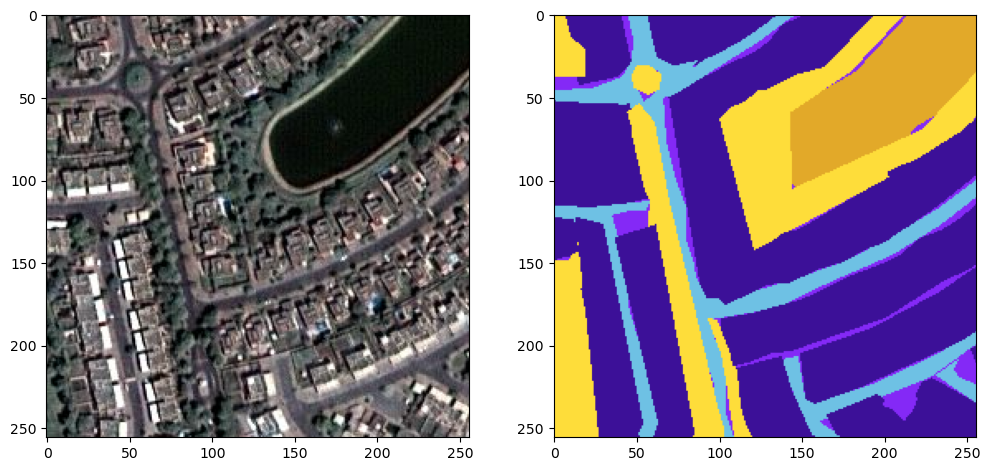

In [9]:
import random
import numpy as np
image_number = random.randint(0, len(image_dataset))
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(np.reshape(image_dataset[image_number], (patch_size, patch_size, 3)))
plt.subplot(122)
plt.imshow(np.reshape(mask_dataset[image_number], (patch_size, patch_size, 3)))
plt.show()

# hexadecimal values 

0 to 9 = 0 to 9 ;
10 to 15 = A to F

There are 6 classes/labels in this semantic segmentation problem. For this 6 classes/labels, we need to convert the given HEX decimal code into RGB

# Calculate the HEX code into RGB values 

In [10]:
building = '#3C1098'.lstrip('#')

building = np.array(tuple(int(building[i:i+2], 16)for i in (0, 2, 4)))
print("The RGB value of building: ", building)

The RGB value of building:  [ 60  16 152]


In [11]:
land =  '#8429F6'.lstrip('#')

land = np.array(tuple(int(land[i:i+2], 16)for i in (0, 2, 4)))
print("The RGB value of land: ", land)

The RGB value of land:  [132  41 246]


In [12]:
Road = '#6EC1E4'.lstrip('#')

Road = np.array(tuple(int(Road[i:i+2], 16)for i in (0, 2, 4)))
print("The RGB value of Road: ", Road)

The RGB value of Road:  [110 193 228]


In [13]:
Vegetation = '#FEDD3A'.lstrip('#')

Vegetation = np.array(tuple(int(Vegetation[i:i+2], 16)for i in (0, 2, 4)))
print("The RGB value of vegetation: ", Vegetation)

The RGB value of vegetation:  [254 221  58]


In [14]:
Water = '#E2A929'.lstrip('#')

Water = np.array(tuple(int(Water[i:i+2], 16)for i in (0, 2, 4)))
print("The RGB value of Water: ", Water)

The RGB value of Water:  [226 169  41]


In [15]:
Unlabeled = '#9B9B9B'.lstrip('#')

Unlabeled = np.array(tuple(int(Unlabeled[i:i+2], 16)for i in (0, 2, 4)))
print("The RGB value of Unlabeled: ", Unlabeled)

The RGB value of Unlabeled:  [155 155 155]


In [16]:
#Assinging the list of mask patches to a variable and performing integer encoding for each class

label = single_mask_patch

def rgb_to_2D_labels(label):
    label_for_classes = np.zeros(label.shape, dtype = np.uint8)
    label_for_classes[np.all(label == building, axis = -1)] = 0
    label_for_classes[np.all(label == land, axis = -1)] = 1
    label_for_classes[np.all(label == Road, axis = -1)] = 2
    label_for_classes[np.all(label == Vegetation, axis = -1)] = 3
    label_for_classes[np.all(label == Water, axis = -1)] = 4
    label_for_classes[np.all(label == Unlabeled, axis = -1)] = 5
    
    label_for_classes = label_for_classes[:, :, 0]
    
    return label_for_classes

In [17]:
#update the new labels to the mask dataset 

labels = []

for i in range(mask_dataset.shape[0]):
    label = rgb_to_2D_labels(mask_dataset[i])
    labels.append(label)
    
labels = np.array(labels)
labels = np.expand_dims(labels, axis = 3)

In [18]:
np.unique(labels)

array([0, 1, 2, 3, 4, 5], dtype=uint8)

In [19]:
labels.shape

(1305, 256, 256, 1)

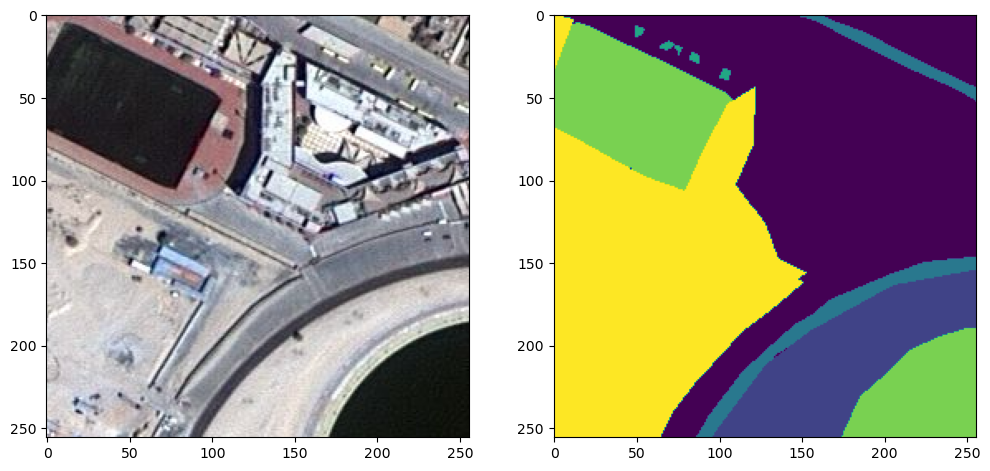

In [20]:
#Sanity check to find the unique labels in the dataset
import random
import numpy as np
image_number = random.randint(0, len(image_dataset))
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(np.reshape(image_dataset[image_number], (patch_size, patch_size, 3)))
plt.subplot(122)
plt.imshow(labels[image_number][:, :, 0])
plt.show()

In [21]:
# Convert the integer encoded values to one-hot encoded values 

n_classes = len(np.unique(labels))

from keras.utils import to_categorical
labels_categorical = to_categorical(labels, num_classes = n_classes)

In [22]:
labels_categorical.shape

(1305, 256, 256, 6)

In [23]:
n_classes

6

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(image_dataset, labels_categorical, 
                                                               test_size=0.20, random_state=42)

In [25]:
print(X_train.shape)
print(Y_train.shape)

(1044, 256, 256, 3)
(1044, 256, 256, 6)


In [26]:
weights = [0.1666, 0.1666, 0.1666, 0.1666, 0.1666, 0.1666] #since there are 6 classes, giving a balanced weight would be 1/6 

dice_loss = sm.losses.DiceLoss(class_weights = weights)
focal_loss = sm.losses.CategoricalFocalLoss()
total_loss = dice_loss + (1 * focal_loss)

In [27]:
IMG_HEIGHT = X_train.shape[1]
IMG_WIDTH = X_train.shape[2]
IMG_CHANNELS = X_train.shape[3]

In [28]:
from simple_multi_unet_model import multi_unet_model, jacard_coef

metrics = ['accuracy', jacard_coef]

def get_model():
    return multi_unet_model(n_classes = n_classes, IMG_HEIGHT=IMG_HEIGHT, IMG_WIDTH=IMG_WIDTH, IMG_CHANNELS=IMG_CHANNELS)

model = get_model()

In [29]:
model.compile(optimizer ='adam', loss = total_loss, metrics = metrics)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 256, 256, 16  448         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 dropout (Dropout)              (None, 256, 256, 16  0           ['conv2d[0][0]']                 
                                )                                                             

                                                                                                  
 dropout_7 (Dropout)            (None, 128, 128, 32  0           ['conv2d_14[0][0]']              
                                )                                                                 
                                                                                                  
 conv2d_15 (Conv2D)             (None, 128, 128, 32  9248        ['dropout_7[0][0]']              
                                )                                                                 
                                                                                                  
 conv2d_transpose_3 (Conv2DTran  (None, 256, 256, 16  2064       ['conv2d_15[0][0]']              
 spose)                         )                                                                 
                                                                                                  
 concatena

In [30]:
model.input_shape

(None, 256, 256, 3)

In [31]:
import tensorflow as tf

In [80]:
history1 = model.fit(X_train,
                    Y_train,
                    batch_size=16,
                    verbose = 1,
                    epochs = 100,
                    validation_data=(X_test, Y_test),
                    shuffle=False)

Epoch 1/100
66/66 [==============================] - 194s 3s/step - loss: 0.9949 - accuracy: 0.5412 - jacard_coef: 0.2815 - val_loss: 0.9839 - val_accuracy: 0.6976 - val_jacard_coef: 0.3296
Epoch 2/100
66/66 [==============================] - 187s 3s/step - loss: 0.9734 - accuracy: 0.6936 - jacard_coef: 0.3890 - val_loss: 0.9660 - val_accuracy: 0.7021 - val_jacard_coef: 0.3958
Epoch 3/100
66/66 [==============================] - 184s 3s/step - loss: 0.9558 - accuracy: 0.7265 - jacard_coef: 0.4642 - val_loss: 0.9595 - val_accuracy: 0.7195 - val_jacard_coef: 0.4646
Epoch 4/100
66/66 [==============================] - 185s 3s/step - loss: 0.9459 - accuracy: 0.7553 - jacard_coef: 0.5147 - val_loss: 0.9494 - val_accuracy: 0.7488 - val_jacard_coef: 0.5148
Epoch 5/100
66/66 [==============================] - 184s 3s/step - loss: 0.9369 - accuracy: 0.7821 - jacard_coef: 0.5634 - val_loss: 0.9379 - val_accuracy: 0.7787 - val_jacard_coef: 0.5341
Epoch 6/100
66/66 [==============================]

Epoch 44/100
66/66 [==============================] - 185s 3s/step - loss: 0.8955 - accuracy: 0.8720 - jacard_coef: 0.7315 - val_loss: 0.9042 - val_accuracy: 0.8599 - val_jacard_coef: 0.7104
Epoch 45/100
66/66 [==============================] - 185s 3s/step - loss: 0.8954 - accuracy: 0.8724 - jacard_coef: 0.7330 - val_loss: 0.9011 - val_accuracy: 0.8625 - val_jacard_coef: 0.7144
Epoch 46/100
66/66 [==============================] - 185s 3s/step - loss: 0.8934 - accuracy: 0.8773 - jacard_coef: 0.7406 - val_loss: 0.9035 - val_accuracy: 0.8580 - val_jacard_coef: 0.7078
Epoch 47/100
66/66 [==============================] - 185s 3s/step - loss: 0.8925 - accuracy: 0.8783 - jacard_coef: 0.7430 - val_loss: 0.9009 - val_accuracy: 0.8648 - val_jacard_coef: 0.7177
Epoch 48/100
66/66 [==============================] - 185s 3s/step - loss: 0.8920 - accuracy: 0.8793 - jacard_coef: 0.7447 - val_loss: 0.9031 - val_accuracy: 0.8604 - val_jacard_coef: 0.7133
Epoch 49/100
66/66 [=========================

Epoch 87/100
66/66 [==============================] - 188s 3s/step - loss: 0.8790 - accuracy: 0.9083 - jacard_coef: 0.8004 - val_loss: 0.9005 - val_accuracy: 0.8677 - val_jacard_coef: 0.7357
Epoch 88/100
66/66 [==============================] - 192s 3s/step - loss: 0.8785 - accuracy: 0.9095 - jacard_coef: 0.8029 - val_loss: 0.9011 - val_accuracy: 0.8683 - val_jacard_coef: 0.7358
Epoch 89/100
66/66 [==============================] - 189s 3s/step - loss: 0.8774 - accuracy: 0.9115 - jacard_coef: 0.8068 - val_loss: 0.9013 - val_accuracy: 0.8682 - val_jacard_coef: 0.7352
Epoch 90/100
66/66 [==============================] - 188s 3s/step - loss: 0.8771 - accuracy: 0.9129 - jacard_coef: 0.8091 - val_loss: 0.9031 - val_accuracy: 0.8637 - val_jacard_coef: 0.7301
Epoch 91/100
66/66 [==============================] - 185s 3s/step - loss: 0.8770 - accuracy: 0.9130 - jacard_coef: 0.8101 - val_loss: 0.9000 - val_accuracy: 0.8697 - val_jacard_coef: 0.7394
Epoch 92/100
66/66 [=========================

In [81]:
model.save('model/unet_trained_100epochs_aerial.hdf5')

In [35]:
from keras.models import load_model
model = load_model("model/unet_trained_100epochs_aerial.hdf5",
                   custom_objects={'dice_loss_plus_1focal_loss': total_loss,
                                   'jacard_coef':jacard_coef})

In [37]:
#IOU
y_pred=model.predict(X_test)
y_pred_argmax=np.argmax(y_pred, axis=3)
y_test_argmax=np.argmax(Y_test, axis=3)

9/9 [==============================] - 7s 764ms/step


Mean IoU = 0.6226041
1/1 [==============================] - 0s 94ms/step


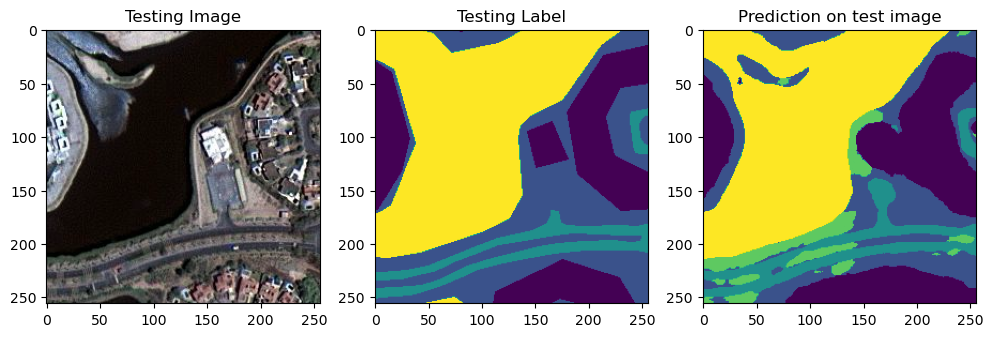

In [40]:

#Using built in keras function for IoU
from keras.metrics import MeanIoU
n_classes = 6
IOU_keras = MeanIoU(num_classes=n_classes)  
IOU_keras.update_state(y_test_argmax, y_pred_argmax)
print("Mean IoU =", IOU_keras.result().numpy())

import random
test_img_number = random.randint(0, len(X_test))
test_img = X_test[test_img_number]
ground_truth=y_test_argmax[test_img_number]
#test_img_norm=test_img[:,:,0][:,:,None]
test_img_input=np.expand_dims(test_img, 0)
prediction = (model.predict(test_img_input))
predicted_img=np.argmax(prediction, axis=3)[0,:,:]


plt.figure(figsize=(12, 8))
plt.subplot(231)
plt.title('Testing Image')
plt.imshow(test_img)
plt.subplot(232)
plt.title('Testing Label')
plt.imshow(ground_truth)
plt.subplot(233)
plt.title('Prediction on test image')
plt.imshow(predicted_img)
plt.show()
